<a href="https://colab.research.google.com/github/Kim-yongbeom/machine-learning/blob/main/data11/%EC%B0%A8%EB%9F%89%EC%97%B0%EB%B9%84%EC%98%88%EC%B8%A1_%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [60]:
import numpy as np
import pandas as pd

In [61]:
df= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/auto-mpg.csv')
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [62]:
del(df['horsepower'])
del(df['origin'])
del(df['car_name'])

In [63]:
df

,mpg,cylinders,displacement,weight,acceleration,model_year
0,18.0,8,307.0,3504,12.0,70
1,15.0,8,350.0,3693,11.5,70
2,18.0,8,318.0,3436,11.0,70
3,16.0,8,304.0,3433,12.0,70
4,17.0,8,302.0,3449,10.5,70
...,...,...,...,...,...,...
393,27.0,4,140.0,2790,15.6,82
394,44.0,4,97.0,2130,24.6,82
395,32.0,4,135.0,2295,11.6,82
396,28.0,4,120.0,2625,18.6,82


In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [65]:
Y_data = df['mpg']
X_data = df.drop(['mpg'], axis=1, inplace=False)

In [66]:
X_data

,cylinders,displacement,weight,acceleration,model_year
0,8,307.0,3504,12.0,70
1,8,350.0,3693,11.5,70
2,8,318.0,3436,11.0,70
3,8,304.0,3433,12.0,70
4,8,302.0,3449,10.5,70
...,...,...,...,...,...
393,4,140.0,2790,15.6,82
394,4,97.0,2130,24.6,82
395,4,135.0,2295,11.6,82
396,4,120.0,2625,18.6,82


In [67]:
X_train,X_test,y_train,y_test = train_test_split(X_data, Y_data, test_size=0.2, random_state=11)

In [68]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(318, 5) (80, 5) (318,) (80,)


In [69]:
logistic_regression = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors=5)
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
lr = LinearRegression()

In [70]:
lr.fit(X_train,y_train)

LinearRegression()

In [141]:
y_predict = lr.predict(X_test)
y_predict[:5]

array([30.93432499, 27.34881728, 22.36635164, 33.31295302, 13.89092909])

In [103]:
from sklearn.metrics import mean_squared_error, r2_score
# mse 회귀선과의 차이 절대값?????
mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)

# MSE, RMSE는 작은게 좋다
print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
# R2는 큰게 좋다
print('R^2(Variance score) : {0:.3f}'.format(r2_score(y_test, y_predict)))

MSE : 13.631, RMSE : 3.692
R^2(Variance score) : 0.782


In [104]:
train_predict = lr.predict(X_train)
train_predict[:5]

array([14.44192646, 25.54659004, 31.74277438, 21.94741539, 14.02139927])

In [105]:
mse = mean_squared_error(y_train, train_predict)
rmse = np.sqrt(mse)
# MSE, RMSE는 작은게 좋다
print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
# R2는 큰게 좋다
print('R^2(Variance score) : {0:.3f}'.format(r2_score(y_train, train_predict)))

MSE : 11.195, RMSE : 3.346
R^2(Variance score) : 0.815


In [101]:
# 절편과 회귀계수를 찍어보자.
print('Y 절편 값: ', lr.intercept_)
print('회귀 계수 값: ', np.round(lr.coef_, 2))

Y 절편 값:  -13.33859860174692
회귀 계수 값:  [-0.13  0.01 -0.01  0.12  0.73]


In [138]:
# 8	318.0	3436	11.0	70
cylinders = input('cylinders >> ')
displacement = input('displacement >> ')
weight = input('weight >> ')
acceleration = input('acceleration >> ')
model_year = input('model_year >> ')

cylinders >> 8
displacement >> 318
weight >> 3436
acceleration >> 11
model_year >> 70


In [139]:
list1 = [cylinders, displacement, weight, acceleration, model_year]
list2 = [list(map(lambda x:float(x),list1))]
a = lr.predict(list2)
a

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([15.86410412])

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns

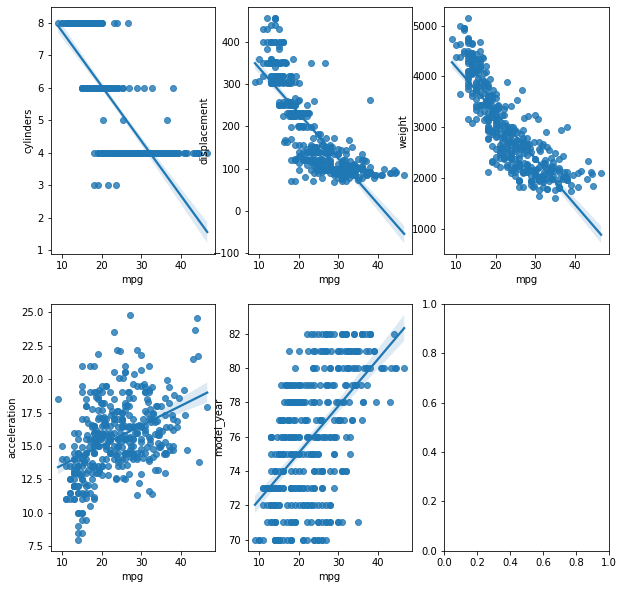

In [133]:
fig, axs = plt.subplots(figsize=(10, 10), ncols=3, nrows=2)
x_features = X_train.columns

for i, feature in enumerate(x_features):
      row = int(i/3)
      col = i%3
      sns.regplot(x='mpg', y=feature, data=df, ax=axs[row][col])

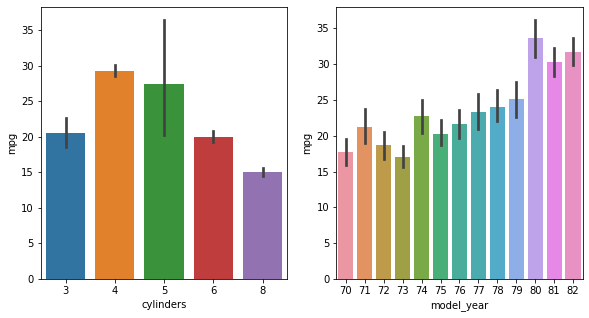

In [134]:
fig = plt.figure(figsize=(15, 5))   
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)

sns.barplot(x='cylinders',y='mpg',data=df, ax=ax1)
sns.barplot(x='model_year',y='mpg',data=df, ax=ax2)

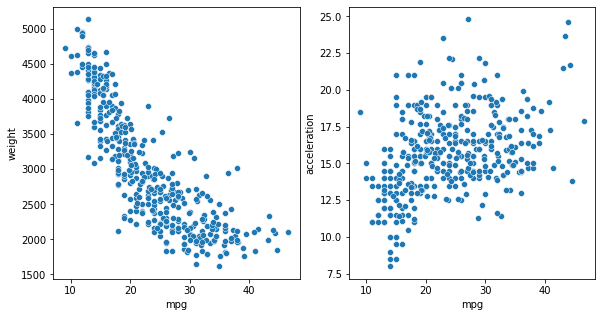

In [137]:
fig = plt.figure(figsize=(15, 5))   
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
sns.scatterplot(x=df['mpg'],y=df['weight'],ax=ax1)
sns.scatterplot(x=df['mpg'],y=df['acceleration'],ax=ax2)